# 2. EDA <a id="data_wrangling"></a>

<a id="contents"></a>
# Table of Contents  
- [2 Exploratory Data Analysis](#eda)
    - [2.1 Introduction](#introduction)
    - [2.2 Imports](#imports)
    - [2.3 Explore the Data](#explore_data)

## 2.1 Introduction<a id="introduction"></a>

The goal of the data science project is to involve analyzing and understanding various housing and rental market indicators for areas within NY in the United States. This notebook invovles conducting thorough EDA to uncover patterns, trends, and relationships within the data. This includes visualizing distributions, time series analysis, correlation matrices, and more detailed explorations. 

### Data
For this project, we have identified multiple data sources to ensure we have approprirate features and targets for our model. 

Data Sources:
1) **Zillow Home Value Index (ZHVI):** A measure of the typical home value and market changes across the US by housing type. It reflects the typical value for homes in the 35th to 65th percentile range. 
2) **Zillow Observed Rent Index (ZORI):** ZORI is a repeat-rent index that is weighted to the rental housing stock to ensure representativeness across the entire market, not just those homes currently listed for-rent. The index is dollar-denominated by computing the mean of listed rents that fall into the 35th to 65th percentile range for all homes and apartments across the US, which is weighted to reflect the rental housing stock.
3) **Zillow Observed Renter Demand Index (ZORDI):** ZORDI tracks engagement on Zillow’s rental listings to proxy changes in rental demand. 

## 2.2 Imports

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import os
import csv
from tqdm.notebook import tqdm
from datetime import datetime, timezone

## 2.3 Explore the Data<a id="explore_data"></a>

In [2]:
df = pd.read_csv('/Users/heatheradler/Documents/GitHub/Springboard/Springboard_Projects/Capstone 3/df_1.csv')

In [3]:
# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])
df.reset_index(drop=True, inplace=True)
df.drop(columns=['Unnamed: 0'], inplace=True)
df

,SourceDataset,RegionID,SizeRank,RegionName,RegionType,StateName,Date,Value,Quarter
0,ZORI,394913,1,"New York, NY",msa,NY,2015-01-31,2367.192976,2015Q1
1,ZORI,394913,1,"New York, NY",msa,NY,2015-02-28,2382.571737,2015Q1
2,ZORI,394913,1,"New York, NY",msa,NY,2015-03-31,2401.539081,2015Q1
3,ZORI,394425,50,"Buffalo, NY",msa,NY,2015-01-31,805.691732,2015Q1
4,ZORI,394425,50,"Buffalo, NY",msa,NY,2015-02-28,819.385346,2015Q1
...,...,...,...,...,...,...,...,...,...
9877,ZORDI,394326,607,"Amsterdam, NY",msa,NY,2024-05-31,138.000000,2024Q2
9878,ZORDI,394504,629,"Cortland, NY",msa,NY,2024-04-30,34.000000,2024Q2
9879,ZORDI,394504,629,"Cortland, NY",msa,NY,2024-05-31,31.000000,2024Q2
9880,ZORDI,395084,784,"Seneca Falls, NY",msa,NY,2024-04-30,65.000000,2024Q2


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9882 entries, 0 to 9881
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   SourceDataset  9882 non-null   object        
 1   RegionID       9882 non-null   int64         
 2   SizeRank       9882 non-null   int64         
 3   RegionName     9882 non-null   object        
 4   RegionType     9882 non-null   object        
 5   StateName      9882 non-null   object        
 6   Date           9882 non-null   datetime64[ns]
 7   Value          9882 non-null   float64       
 8   Quarter        9882 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(5)
memory usage: 695.0+ KB


In [5]:
# Summary statistics of numerical columns
print("\nSummary Statistics:")
print(df.describe())


Summary Statistics:
            RegionID     SizeRank                           Date  \
count    9882.000000  9882.000000                           9882   
mean   402074.928152   341.767355  2014-05-07 03:32:01.311475456   
min    394308.000000     1.000000            2000-01-31 00:00:00   
25%    394501.000000   169.000000            2007-12-31 00:00:00   
50%    394719.000000   369.000000            2015-09-30 00:00:00   
75%    394986.000000   528.000000            2021-02-28 00:00:00   
max    845159.000000   784.000000            2024-05-31 00:00:00   
std     57025.745615   211.678872                            NaN   

               Value  
count    9882.000000  
mean   111650.651979  
min        -2.000000  
25%     64050.839890  
50%    108613.181787  
75%    142756.484706  
max    657279.223513  
std     92895.955840  


In [6]:
# Check for uniqueness of the composite key
unique_rows = df[['SourceDataset', 'RegionID', 'Date']].drop_duplicates().shape[0]
total_rows = df.shape[0]

if unique_rows == total_rows:
    print("The composite key (SourceDataset, RegionID, Date) is unique for each row.")
else:
    print("The composite key (SourceDataset, RegionID, Date) is not unique for each row.")

The composite key (SourceDataset, RegionID, Date) is unique for each row.


**Observations**:

* The dataset requires 3 columns to be combined to form an identifier (SourceDataset, RegionID, and Date).
* There are no columns/rows with null values which indicated that there are no missing data in any records.

## Data Visualizations

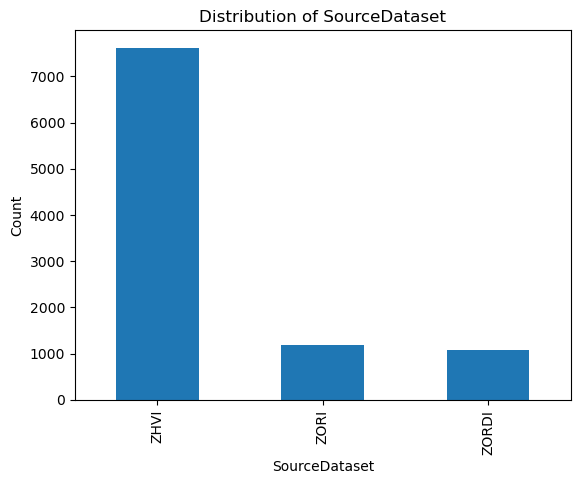

In [7]:
# Distribution of 'SourceDataset'
df['SourceDataset'].value_counts().plot(kind='bar')
plt.title('Distribution of SourceDataset')
plt.xlabel('SourceDataset')
plt.ylabel('Count')
plt.show()

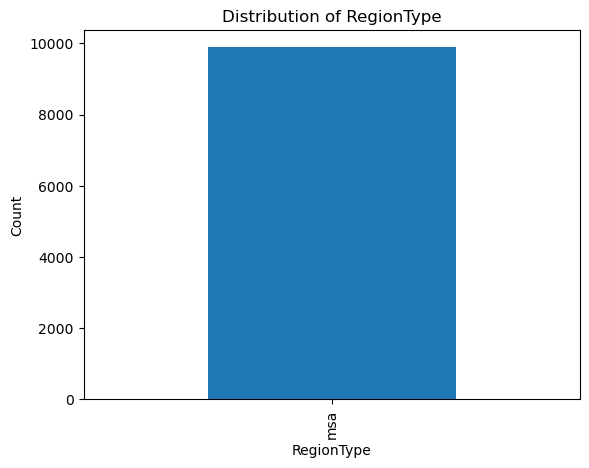

In [8]:
# Distribution of 'RegionType'
df['RegionType'].value_counts().plot(kind='bar')
plt.title('Distribution of RegionType')
plt.xlabel('RegionType')
plt.ylabel('Count')
plt.show()

**Observations**:
As there is only 1 type of Region, RegionType can be removed from the df.

In [9]:
df.drop(columns=['RegionType'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9882 entries, 0 to 9881
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   SourceDataset  9882 non-null   object        
 1   RegionID       9882 non-null   int64         
 2   SizeRank       9882 non-null   int64         
 3   RegionName     9882 non-null   object        
 4   StateName      9882 non-null   object        
 5   Date           9882 non-null   datetime64[ns]
 6   Value          9882 non-null   float64       
 7   Quarter        9882 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 617.8+ KB


In [10]:
# Summary statistics for extreme regions
summary_stats = df.groupby(['RegionName', 'SourceDataset'])['Value'].describe()
print(summary_stats)

                             count           mean           std  \
RegionName    SourceDataset                                       
Albany, NY    ZHVI           293.0  205928.368493  49044.306088   
              ZORDI           48.0     143.395833     34.390585   
              ZORI           113.0    1261.380145    160.137446   
Amsterdam, NY ZHVI           293.0  111524.870132  28908.916741   
              ZORDI           38.0     183.421053     48.381721   
...                            ...            ...           ...   
Utica, NY     ZORDI           48.0      94.645833     29.615615   
              ZORI            74.0    1081.733796    150.088282   
Watertown, NY ZHVI           293.0  126261.171265  40172.766671   
              ZORDI           48.0      43.104167     14.275764   
              ZORI           113.0    1170.856802    135.806454   

                                       min            25%            50%  \
RegionName    SourceDataset                         

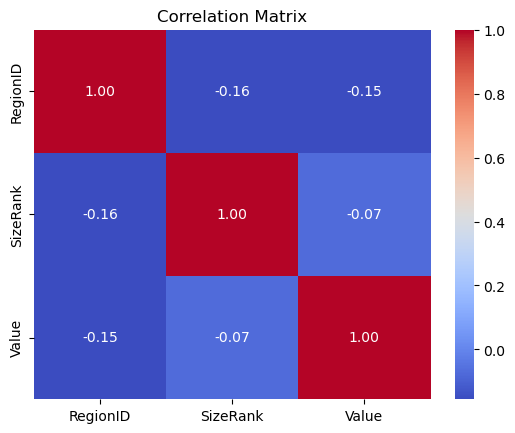

In [11]:
# Correlation matrix
numeric_columns = df.select_dtypes(include=[float, int]).columns
correlation_matrix = df[numeric_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

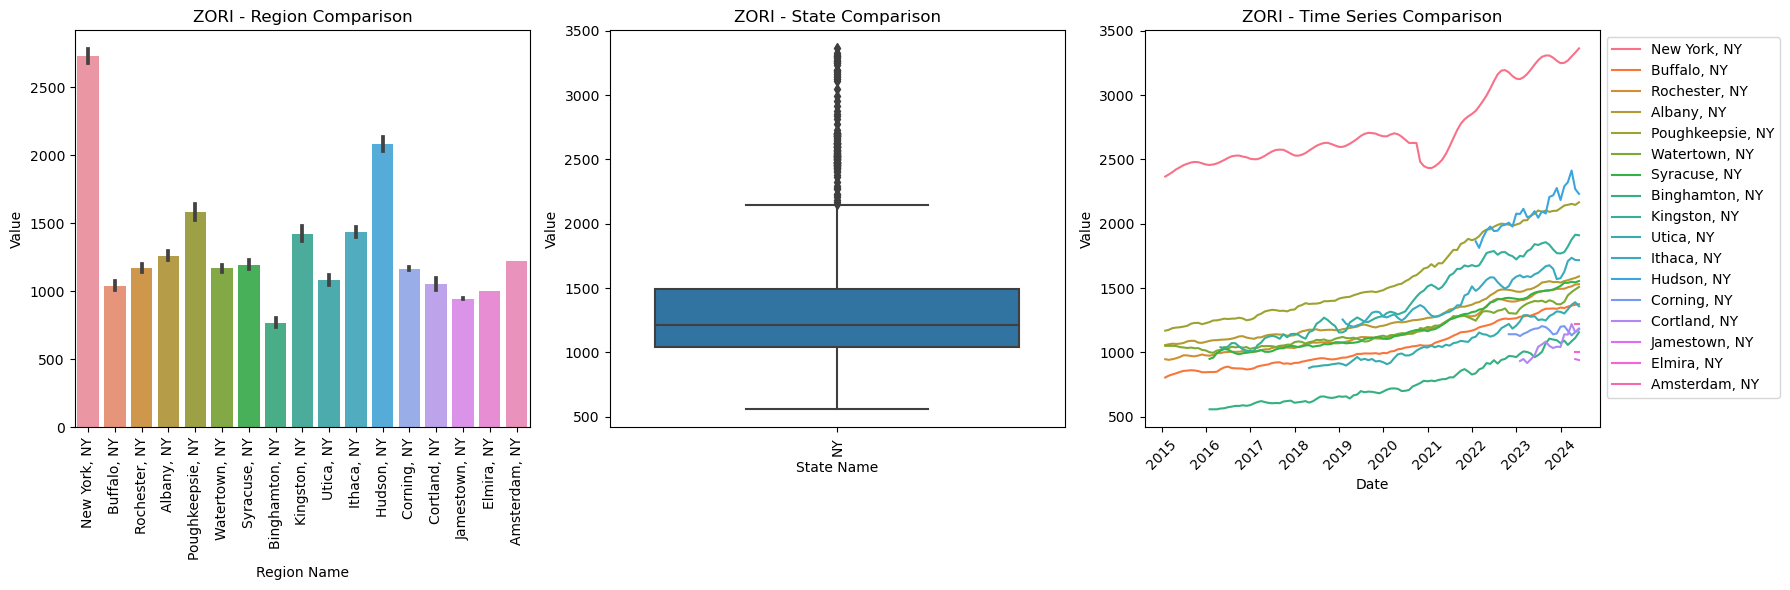

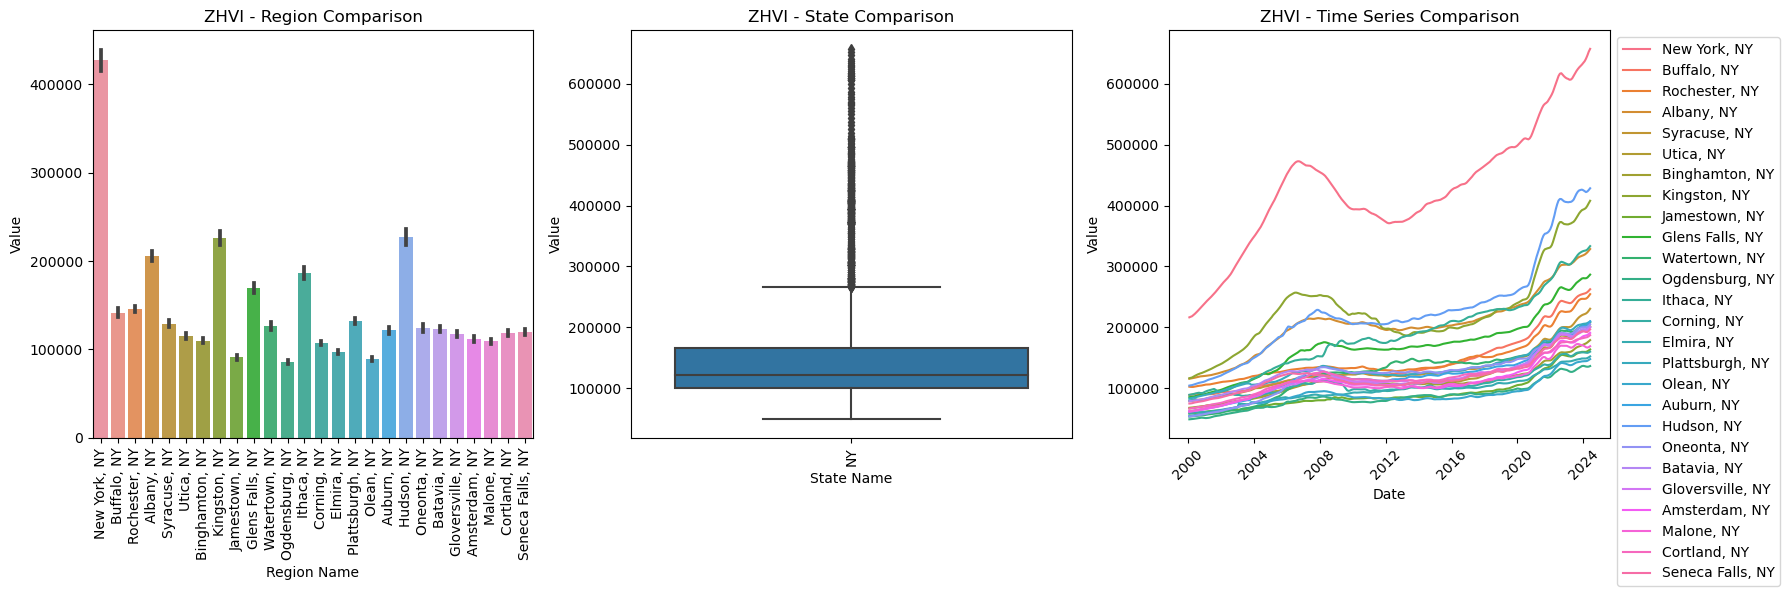

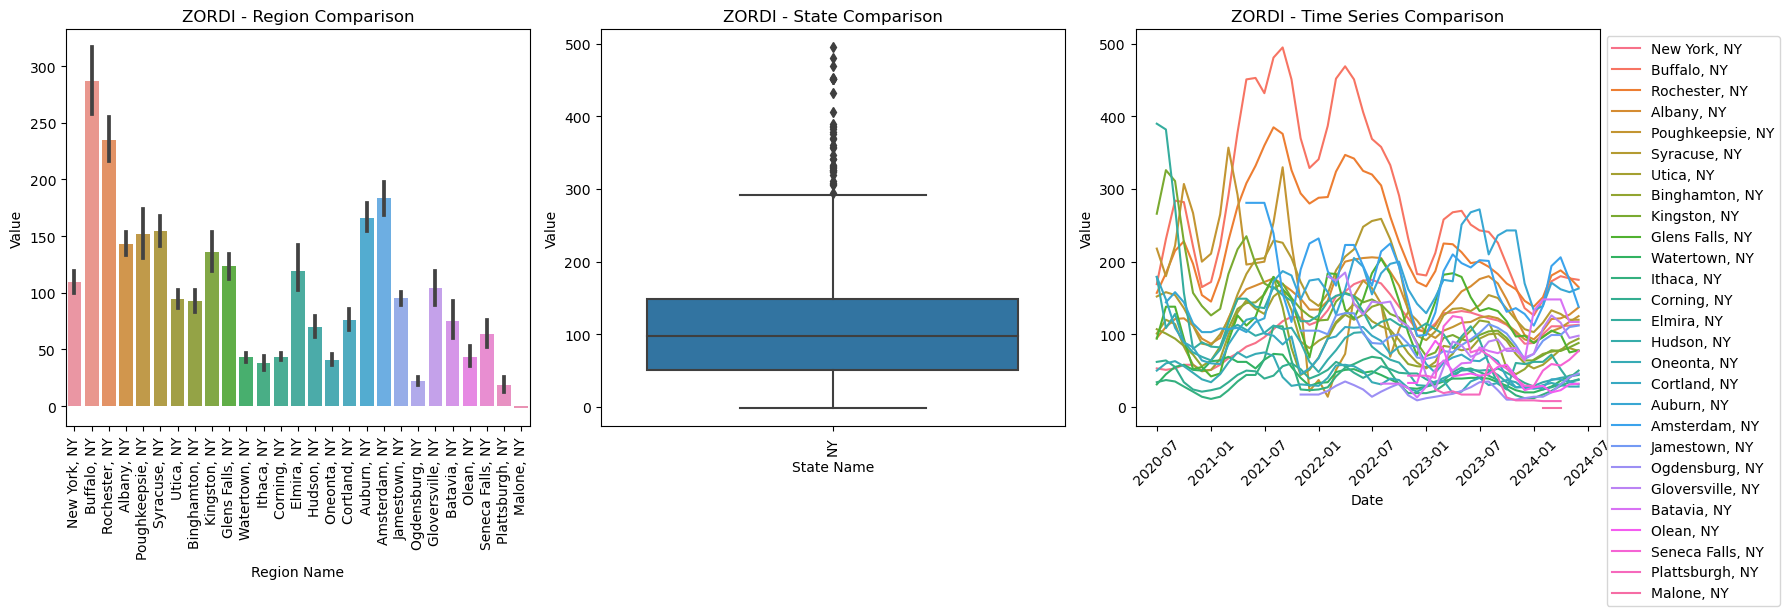

In [12]:
# Function to create plots for each data source
def plot_comparison(df, data_source):
    # Create separate figures for each data source
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))
    
    # Plot for the first subplot
    sns.barplot(x='RegionName', y='Value', data=df[df['SourceDataset'] == data_source], ax=axes[0])
    axes[0].set_title(f'{data_source} - Region Comparison')
    axes[0].set_xlabel('Region Name')
    axes[0].set_ylabel('Value')
    axes[0].tick_params(axis='x', rotation=90)
    
    # Plot for the second subplot
    sns.boxplot(x='StateName', y='Value', data=df[df['SourceDataset'] == data_source], ax=axes[1])
    axes[1].set_title(f'{data_source} - State Comparison')
    axes[1].set_xlabel('State Name')
    axes[1].set_ylabel('Value')
    axes[1].tick_params(axis='x', rotation=90)
    
    # Plot for the third subplot
    sns.lineplot(x='Date', y='Value', hue='RegionName', data=df[df['SourceDataset'] == data_source], ax=axes[2])
    axes[2].set_title(f'{data_source} - Time Series Comparison')
    axes[2].set_xlabel('Date')
    axes[2].set_ylabel('Value')
    axes[2].tick_params(axis='x', rotation=45)
    axes[2].legend(loc='upper left', bbox_to_anchor=(1, 1))
    
    plt.tight_layout()
    plt.show()

# Plot for each data source
plot_comparison(df, 'ZORI')
plot_comparison(df, 'ZHVI')
plot_comparison(df, 'ZORDI')

**Observations**:
1) There is substantial variability in rental indices, housing prices, and economic indicators across different regions.
2) New York, NY, consistently appears as a region with higher values across all three datasets, indicating it is a key area of interest.
3) The distribution of values within the state shows significant outliers, suggesting that certain regions experience extreme values compared to the median.
4) Time series plots reveal upward trends in rental indices and housing prices, with economic indicators showing more fluctuation over time.
5) The presence of outliers and skewed distributions across the datasets indicates the need for further investigation into these extreme values and their impact on the overall analysis.

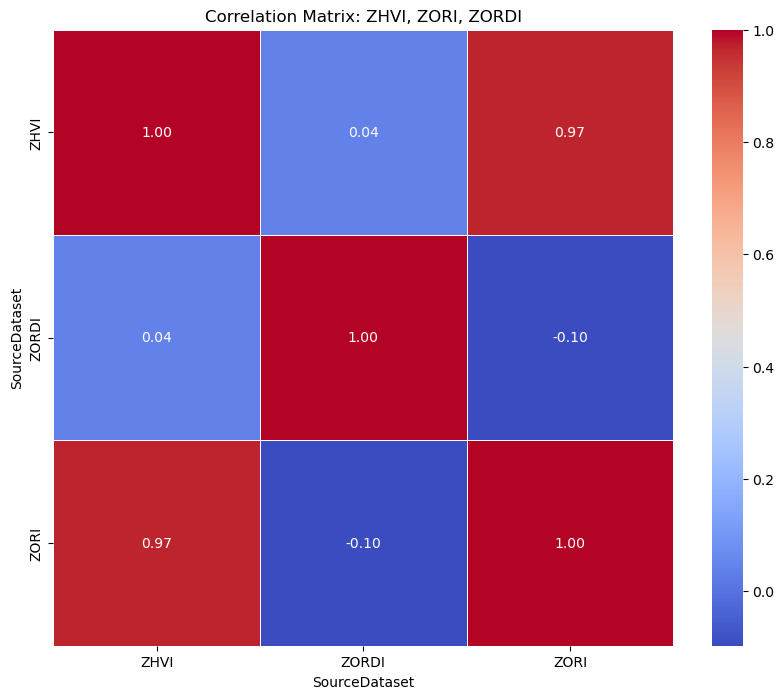

In [13]:
relevant_data = df[df['SourceDataset'].isin(['ZHVI', 'ZORI', 'ZORDI'])]

# Pivot the data to have SourceDataset as columns and Value as values, indexed by RegionName and Date
pivot_data = relevant_data.pivot_table(index=['RegionName', 'Date'], columns='SourceDataset', values='Value').reset_index()

# Select only the numeric columns for correlation calculation
numeric_columns = pivot_data.select_dtypes(include=[float, int]).columns
correlation_matrix = pivot_data[numeric_columns].corr()

# Visualize correlations using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix: ZHVI, ZORI, ZORDI')
plt.show()

**Observations**:
1) ZHVI and ZORI: The correlation is 0.97, which indicates a very strong positive relationship between home values and rental indices which suggests that as home values increase, rental prices tend to increase as well, and vice versa.
2) ZHVI and ZORDI: The correlation is 0.04, indicating a very weak positive correlation. This implies that there is little to no linear relationship between home values and the observed renter demand index.
3) ZORI and ZORDI: The correlation is -0.10, indicating a weak negative correlation. This suggests that there is a slight tendency for rental prices to decrease when the observed renter demand index increases, but the relationship is not strong.
4) ZORDI and ZHVI: The correlation is 0.04, indicating a very weak positive correlation, suggesting little to no linear relationship between renter demand and home values. The strong correlation between ZHVI and ZORI could imply that changes in the housing market significantly affect the rental market. However, the weak correlation with ZORDI suggests that renter demand may be influenced by factors other than just housing prices and rental indices.

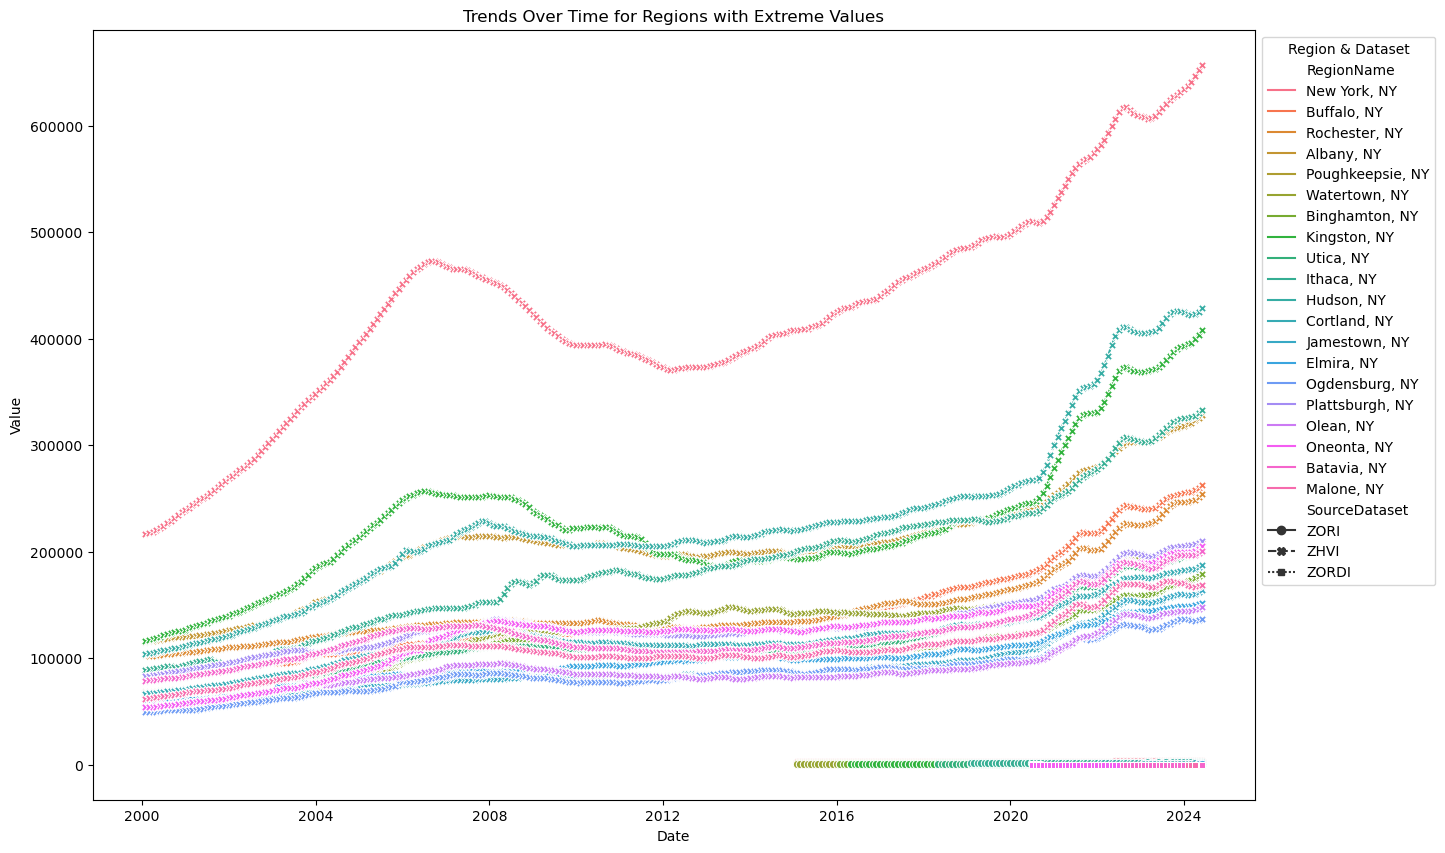

In [14]:
# Function to filter regions with extreme values
def get_extreme_regions(df, column, num_regions=5):
    highest_regions = df.groupby('RegionName')[column].max().nlargest(num_regions).index
    lowest_regions = df.groupby('RegionName')[column].min().nsmallest(num_regions).index
    return highest_regions, lowest_regions

# Identify regions with extreme values for ZHVI, ZORI, ZORDI
extreme_zhvi_high, extreme_zhvi_low = get_extreme_regions(df[df['SourceDataset'] == 'ZHVI'], 'Value')
extreme_zori_high, extreme_zori_low = get_extreme_regions(df[df['SourceDataset'] == 'ZORI'], 'Value')
extreme_zordi_high, extreme_zordi_low = get_extreme_regions(df[df['SourceDataset'] == 'ZORDI'], 'Value')

# Filter dataset for extreme regions
extreme_regions = set(extreme_zhvi_high).union(extreme_zhvi_low, extreme_zori_high, extreme_zori_low, extreme_zordi_high, extreme_zordi_low)
extreme_df = df[df['RegionName'].isin(extreme_regions)]

# Plot trends over time for extreme regions
plt.figure(figsize=(15, 10))
sns.lineplot(data=extreme_df, x='Date', y='Value', hue='RegionName', style='SourceDataset', markers=True)
plt.title('Trends Over Time for Regions with Extreme Values')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend(title='Region & Dataset', loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

**Observations**:
1) New York, NY and Albany, NY show a particularly steep increase in ZHVI over time, indicating a significant rise in housing prices in these regions suggesting that these regions might be experiencing rapid real estate appreciation, possibly due to high demand, limited supply, or economic growth.

2) The ZORI values for most regions appear relatively stable over time compared to the sharp increase seen in ZHVI. This stability indicates that rental prices might not be increasing at the same rate as housing prices, which could suggest different dynamics in the rental market versus the housing market.

3) There is a high correlation between ZHVI and ZORI values for some regions, while others show divergences, indicating that the relationship between housing prices and rental prices is not uniform across all regions. Understanding these correlations and divergences can help identify regions where housing and rental markets are tightly linked versus regions where they behave more independently.

In [15]:
# save concatenated dataframe
df.to_csv('/Users/heatheradler/Documents/GitHub/Springboard/Springboard_Projects/Capstone 3/df_eda.csv')